# Tutorial: Data Cleansing and the Tidyverse

This lab serves as an introduction to data processing in R using the `tidyverse` family of packages. We cover a lot of material in this tutorial, and recommend coming back to use this as a reference while you learn the `tidyverse` ropes.

## Goals:
* Learn about the pipe operator
* Learn how to use `tidyverse`
* Learn various data transformations in R

---
# Getting started

For many people, their first instinct when it comes to data cleansing is to open their data with Excel and just start manually cleaning it up by replacing values, creating new columns, etc. The problem with that approach is that you cannot easily replicate the steps you have taken to transform the raw data into the final format you use for your analyses. This issue has many consequences, but among the two most common are, first, that if you get new or additional data from the same source, you would have to manually perform the same operations again, and second, if you make a mistake it would be difficult to identify where exactly that happened. The best approach is to preprocess your data with a script in the same way you do your analyses. However, doing so in base R can be quite cumbersome. In this tutorial, you will learn how to use tools for the **`tidyverse`** packages. Tidyverse is a collection of useful packages, which include **`ggplot2`**, **`tidyr`**, **`dplyr`**, etc, combined in a single package.

Before we begin, you'll need to install and load the `tidyverse` package:

In [ ]:
# function to install the packages if missing, otherwise, just load them
import_packages <- function(packages) {
    for (package in packages) {
        if (!(package %in% row.names(installed.packages()))) { #if the package is not installed
            install.packages(package, repos = "http://cran.us.r-project.org") #install from archive
        } 
        library(package, character.only = TRUE) #load the set of packages that you gave to the function
    }
}

import_packages(c('tidyverse')) #call the function with tidyverse as the input

Or you can do this: 

In [1]:
install.packages('tidyverse')
library(tidyverse)


The downloaded binary packages are in
	/var/folders/yg/xzc1rwm52nxc0l8mlvk8dkjw0000gp/T//RtmpbqB2L2/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Data 

We will use the `iris` dataset for illustrating the tidyverse functions. You can save it to a `dat` variable like this:

In [4]:
dat <- iris
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


The `iris` dataset contains [measurement data](https://eloquentarduino.github.io/2019/12/iris-classification-on-arduino/) for different species of iris flowers. You can view a detailed description of the dataset by typing:
```
?iris
```

---
# A standardized grammar
One of the reasons that the tidyverse is so popular for data manipulation and analysis is that it uses a **standardized grammar** across all of its packages. This means that it's really easy to make different functions talk to each other, and function options or additional arguments all match the same style so they're easier to remember.

In the tidyverse, the first argument of a function is always the **object** that you want to perform the given function on. For example,

```
mutate(data, var1 = c(1, 2, 3, 4))
```
would take the data frame `data`, and add a new column called `var1` consisting of the given vector.

This object-as-first-argument style is really helpful when you want to take the output of one function and funnel it in as the input of the next function. This is achieved using the **pipe**.

## Pipes: the %>% operator

You might have noticed the weird **`%>%`** operator in the code in prior tutorials. This operator is called a **'pipe'**. Pipes are present in many programming languages, but not in the base R, so you might not be familiar with them. Pipes are an added feature from the Tidyverse package. 

A pipe serves as a link between two objects, whether they be variables or functions. The pipe tells R to take the object on its left side and pass it as the first argument to the function on the right. 

Typically in R, if you want to pass an argument to a function, you specify it as `function(argument)`. For example, if you want to find the mean of the iris `Sepal.Width`, in base R you would do this:

In [5]:
mean(iris$Sepal.Width)

[1] 3.057333

If you use a pipe, you just put the argument on its left side, and the function on the right, i.e., `variable  %>% function()`:

In [6]:
iris$Sepal.Width %>% mean()

[1] 3.057333

Now, you might be asking, why would you want to use **x %>% mean()** instead of **mean(x)**? Pipes come in handy, particularly when you have to run a series of functions on the same input. For example, let's say you want to find the mean of the observations, and then round the value to 2 significant digits. In base R, you can do this in two ways:

1. nest the functions within one another
2. assign a temporary variable for the mean, and then round that value

In [7]:
# nested
round(mean(iris$Sepal.Width), 2)

# tmp variable
obs_mean = mean(iris$Sepal.Width)
round(obs_mean, 2)

[1] 3.06

[1] 3.06

Since pipes take the output of the expression on the left and send it as the first input to the expression on the right, you can do the following with pipes:

In [8]:
# with pipes
iris$Sepal.Width %>% 
    mean() %>% 
    round(2)

[1] 3.06

This reads smoothly from start to finish as, "Take the observations, find the mean, and then round it to two decimals." 

Note that it's best practice to start a new row after each pipe operator, with the following functions indented.

`round()` is not a tidyverse function, but notice that it also typically takes as first argument the **value** to be rounded, and as a second argument the number of digits to which to round. When you use a pipe, the first argument is implicitly filled in with the value on the left, so the first argument you actually type corresponds to the number of significant digits to which to round. 

This is the magic of the tidyverse pipe. As we'll see with our tidyverse functions below, you often want to use many of them, all in a row, on the same data object. While the above example might be easy to read in its nested form, it becomes very difficult to track what is going on with this approach as your code gets more complex. 

**Thus pipes have two advantages:**

1. **Readability** - it is easier to see what goes on, because you can track the sequence naturally top to bottom. In contrast, with nested functions, you have to identify the inner-most function and then work your way outwards.
2. **Efficiency** - do not clutter your environment with temporary variables that you needed for only one intermediary observation.

To show the difference in readability, here is how the code for the long to wide functions would look if we wrote it with nested functions, rather than with pipes:

In [ ]:
# with pipes
long_data  %>% 
    mutate(timepoint = paste0('time',timepoint))  %>% 
    spread(timepoint, observation)

# nested functions
spread(mutate(long_data, timepoint = paste0('time',timepoint)), timepoint, observation)

# temporary variables
mutated_data <- mutate(long_data, timepoint = paste0('time',timepoint))
spread(mutated_data, timepoint, observation)

subject,time1,time2,time3,time4
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56,-0.48,0.64,-0.18
2,0.38,0.56,-1.83,-0.43
3,-0.94,-1.57,1.32,-0.31


subject,time1,time2,time3,time4
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56,-0.48,0.64,-0.18
2,0.38,0.56,-1.83,-0.43
3,-0.94,-1.57,1.32,-0.31


subject,time1,time2,time3,time4
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56,-0.48,0.64,-0.18
2,0.38,0.56,-1.83,-0.43
3,-0.94,-1.57,1.32,-0.31


We can see how much easier it is to interpret the tidyverse version.

Because the pipe is so annoying to type, there is a handy keyboard shortcut:


**Mac**: shift + command + M

**PC**: shift + control + M

---
# Transforming data with tidyverse functions

Below is a summary of the functions we will review and their general description:

* **`mutate()`** - transforming existing variables and creating new variables
* **`summarise()`** - summarizing variables
* **`filter()`** - filtering dataframes
* **`select()`** - selecting columns to keep/remove
* **`arrange()`** - sorting by column/columns
* **`unite()`** - combine two columns into one
* **`separate()`** - split one column into multiple columns
* **`*_join()`** - merging multiple dataframes
* **`group_by()`** - performing the same operation to different subgroups of data and combining the results
* **`nest()`** - subgroup data such that a cell holds an entire data frame
* **`pivot_wider()`** - transforming data to wide format (formerly `spread()`)
* **`pivot_longer()`** - transforming data to long format (formerly `gather()`)
* **`map()`** - perform the same function on each element of list or vector

## `mutate()`: Transforming existing variables and creating new variables

`mutate()` is part of `dplyr`, one of the packages included in `tidyverse` that is handy for data manipulation. The `mutate()` command allows you to create new columns, i.e. new variables.  Let's say you want to center the sepal lengths in the `iris` dataset by subtracting the mean:

In [ ]:
dat <- dat  %>%  #need to reassign the dat object with our new changes
    mutate(centered_SepLen = Sepal.Length - mean(Sepal.Length))

head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333
2,4.9,3.0,1.4,0.2,setosa,-0.9433333
3,4.7,3.2,1.3,0.2,setosa,-1.1433333
4,4.6,3.1,1.5,0.2,setosa,-1.2433333
5,5.0,3.6,1.4,0.2,setosa,-0.8433333
6,5.4,3.9,1.7,0.4,setosa,-0.4433333


All commands in the `dplyr` package (and most in the broader tidyverse) allow you to create and reference variables within a data.frame object, without needing to type in the name of the data.frame each time. This is called **tidy evaluation**. 

For example, if you want to create several variables in base R (that is, without using `dplyr` functions), you would have to do this everytime:

In [ ]:
# center sepal length
dat$centered_SepLen = dat$Sepal.Length - mean(dat$Sepal.Length) 
# transforms petal length into zscores
dat$PetLen_zscores = (dat$Petal.Length - mean(dat$Petal.Length))/sd(dat$Petal.Length)

Using `dplyr`, you don't have to write `dat$` every time you refer to a variable:

In [ ]:
dat <- dat  %>%  
    mutate(centered_SepLen = Sepal.Length - mean(Sepal.Length),  # center Sepal Lengths
           PetLen_zscores = (Petal.Length - mean(Petal.Length))/sd(Petal.Length),  # zscore the Petal Lengths
           n_flowers = length(Species))              # calculate the total number of flowers
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333,-1.335752,150
2,4.9,3.0,1.4,0.2,setosa,-0.9433333,-1.335752,150
3,4.7,3.2,1.3,0.2,setosa,-1.1433333,-1.392399,150
4,4.6,3.1,1.5,0.2,setosa,-1.2433333,-1.279104,150
5,5.0,3.6,1.4,0.2,setosa,-0.8433333,-1.335752,150
6,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150


As you see, you can create multiple variables at the same time within a single `mutate` command, by separating them with commas. It's best practice to start each new variable on a new line to maintain readability.

## `summarise()`: Summarizing variables

`Mutate()` creates new variables within the existing dataset and does not change the number of rows. You might also want to calculate statistics that summarize the whole data set. For example, in the example above I calculated how many flowers were measured total (`n_flowers`) - but it doesn't really make sense to output this as a variable with entries for every observation. If you want to create a new data.frame in which you store the summary values for one or more variables, you can use the `summarise()` command. Let's get summaries for a few of the existing variables:

In [ ]:
smry <- dat  %>% #creating new smry object
    summarise(n_flowers = length(Species), #how many observations (flowers) are there total? 
              shortSepal_prop = mean(centered_SepLen < 0), #what prop. have smaller-than-average sepal length?
              setosa_prop = mean(Species == 'setosa'), #what prop. of measured flowers are species Setosa?
              SepLen_mean = mean(Sepal.Length), #mean sepal length
              SepLen_sd = sd(Sepal.Length), #standard deviation of sepal length
              SepLen_se = SepLen_sd / sqrt(n_flowers)
              )
smry
              

n_flowers,shortSepal_prop,setosa_prop,SepLen_mean,SepLen_sd,SepLen_se
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
150,0.5333333,0.3333333,5.843333,0.8280661,0.06761132


You should note several things. When you get to a new row, you can refer to a variable you have already created on a previous row. (The same is true of `mutate`.) For example, when we calculate the standard error for `Sepal.Length`, we have put `SepLen_se = SepLen_sd / sqrt(n_flowers)`, in which SepLen_sd and n_flowers do not exist in the original data.frame, but are variables that we created on previous rows. We could have written it directly as `SepLen_se = sd(Sepal.Length) / sqrt(length(Species))`, but doing it in the above way is more efficient and readable.

## `filter()`: Retaining or removing rows based on a condition

Here are three scenarios:
* you find that there was an error with data collection for one species of flower (e.g. setosa) and you want to remove it from the data.frame
* you find out that some flowers have a negative `Sepal.Length` value, which is an error, and you want to remove them
* you want to separate the data for the remaining two species into separate datasets

You can do all of these things with the **`filter`** command, which uses a logical argument to identify subsets of rows (observations). Rows for which the logical is TRUE will be retained in the data frame, and all others will be removed:

In [18]:
print(paste('species options:',paste(levels(dat$Species),collapse=", ")))

# get rid of all setosa flowers and any flowers with negative sepal lengths
cleaned_dat <- dat  %>% 
    filter(Species != 'setosa', #!= is read "not equal to"
           Sepal.Length >= 0)

# make new data.frames for the remaining two species
versi.dat <- filter(cleaned_dat, Species == 'versicolor')
virgi.dat <- filter(cleaned_dat, Species == 'virginica')

# look at first six rows of all three data.frames
head(cleaned_dat); head(versi.dat); head(virgi.dat)

[1] "species options: setosa, versicolor, virginica"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,7.0,3.2,4.7,1.4,versicolor,long
2,6.4,3.2,4.5,1.5,versicolor,long
3,6.9,3.1,4.9,1.5,versicolor,long
4,5.5,2.3,4.0,1.3,versicolor,long
5,6.5,2.8,4.6,1.5,versicolor,long
6,5.7,2.8,4.5,1.3,versicolor,long


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,7.0,3.2,4.7,1.4,versicolor,long
2,6.4,3.2,4.5,1.5,versicolor,long
3,6.9,3.1,4.9,1.5,versicolor,long
4,5.5,2.3,4.0,1.3,versicolor,long
5,6.5,2.8,4.6,1.5,versicolor,long
6,5.7,2.8,4.5,1.3,versicolor,long


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,6.3,3.3,6.0,2.5,virginica,long
2,5.8,2.7,5.1,1.9,virginica,long
3,7.1,3.0,5.9,2.1,virginica,long
4,6.3,2.9,5.6,1.8,virginica,long
5,6.5,3.0,5.8,2.2,virginica,long
6,7.6,3.0,6.6,2.1,virginica,long


Here's where the pipe becomes useful. Let's say you want to calculate the summarise we described above separately for the versicolor and virginica species. I will show you later how to do it more efficiently, but for the moment we can illustrate how you can chain commands with pipes. Rather than creating the intermediate `versi.dat` and `virgi.dat` dataframes, we can chain the `summarise` function after the `filter` function. In the example below, we pass `dat` as the first argument of `filter`, then specify to keep only versicolor flowers, and then the resulting data.frame is passed on as the first argument to `summarise`:

In [19]:
# calculate summarise for versicolor species
dat  %>% 
 filter(Species == 'versicolor')  %>% 
 summarise(SepLen_mean = mean(Sepal.Length),
           SepLen_sd = sd(Sepal.Length))

# calculate summarise for virginica species
dat  %>% 
 filter(Species == 'virginica')  %>% 
 summarise(SepLen_mean = mean(Sepal.Length),
           SepLen_sd = sd(Sepal.Length))

SepLen_mean,SepLen_sd
<dbl>,<dbl>
5.936,0.5161711


SepLen_mean,SepLen_sd
<dbl>,<dbl>
6.588,0.6358796


**_TIP_**: it is very easy to remove missing values by using the `!is.na(variable)` command. E.g. if some flowers are missing petal length measurements, you can exclude them by doing **`filter(dat, !is.na(Petal.Length))`**

## `select()`: Removing/selecting columns to keep

Often the dataset contains many irrelevant columns that make it difficult to display the dataframe all at once. You can easily choose which columns to keep or remove in a data.frame with the **`select()`** command. It has complex usage, and I suggest checking the help, i.e. type `?select`. However, the basic usage is as follows: 

In [20]:
dat  %>% 
    select(Species, Petal.Length, Petal.Width) %>%
    head() 
#to keep only specific variables, list them one after another like above

,Species,Petal.Length,Petal.Width
,<fct>,<dbl>,<dbl>
1,setosa,1.4,0.2
2,setosa,1.4,0.2
3,setosa,1.3,0.2
4,setosa,1.5,0.2
5,setosa,1.4,0.2
6,setosa,1.7,0.4


* If you want to **remove** only specific variables, list each with a **-** sign:

In [21]:
dat  %>% 
    select(-Petal.Length, -Petal.Width) %>%
    head()  #remove original sepal length & width variables

,Sepal.Length,Sepal.Width,Species,PetalType
,<dbl>,<dbl>,<fct>,<chr>
1,5.1,3.5,setosa,short
2,4.9,3.0,setosa,short
3,4.7,3.2,setosa,short
4,4.6,3.1,setosa,short
5,5.0,3.6,setosa,short
6,5.4,3.9,setosa,short


* If you want to keep a sequence of variables, you can specify the first and the last using a range:

In [ ]:
# look at full data set
head(dat)

# look at just a certain range of variables
dat  %>% 
    select(Sepal.Length:Species) %>%
    head()  #note: this is an inclusive range (first and last variables included)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333,-1.335752,150
2,4.9,3.0,1.4,0.2,setosa,-0.9433333,-1.335752,150
3,4.7,3.2,1.3,0.2,setosa,-1.1433333,-1.392399,150
4,4.6,3.1,1.5,0.2,setosa,-1.2433333,-1.279104,150
5,5.0,3.6,1.4,0.2,setosa,-0.8433333,-1.335752,150
6,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


The tidyverse also has something called **tidy selection** which makes it easy to "batch" select based on patterns in variable names. For example, we can use `starts_with()` to select all columns starting with "Petal":

In [13]:
dat  %>% 
    select(starts_with("Petal")) %>% 
    head()

,Petal.Length,Petal.Width
,<dbl>,<dbl>
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
6,1.7,0.4


Other selection helpers include `ends_with()`, `contains()`, `matches()` and `num_range()`. Learn more with `?tidyselect::ends_with()`.

## `arrange()`: Sorting the data.frame by columns

If you want to sort your data.frame by one or more columns you can use the `arrange()` command, where you list the variables in the order in which you want the sorting to occur. The default is to sort by ascending order for each variable. If you want to sort by descending order for one of them, you can surround the variable in the `desc()` command. Let's sort the flowers by species, and then within each species, by descending petal length:

In [ ]:
dat %>% 
    arrange(Species, desc(Petal.Length)) %>%
    head()

#dat  %>% 
#    arrange(desc(Species), desc(Petal.Length)) %>%
#    head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,4.8,3.4,1.9,0.2,setosa,-1.0433333,-1.052513,150
2,5.1,3.8,1.9,0.4,setosa,-0.7433333,-1.052513,150
3,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150
4,5.7,3.8,1.7,0.3,setosa,-0.1433333,-1.165809,150
5,5.4,3.4,1.7,0.2,setosa,-0.4433333,-1.165809,150
6,5.1,3.3,1.7,0.5,setosa,-0.7433333,-1.165809,150


Note: since the `Species` variable is a factor, not a numeric variable, it will be sorted by the order listed by `levels(dat$Species)`. You can test this out by uncommenting the second line in the code cell above - since the flowers are now sorted in the reverse `Species` order, the first six rows shown by `head()` are now virginica, not setosa. 

## `unite()`: Combine/concatenate values from two columns into one

Let's say flowers with short petals are fundamentally different from those with long petals. I'm going to make a new categorical variable, `PetalType`, that can either be "long" or "short". *To learn more about the `if_else()` function used below, type `?if_else`.*

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,5.1,3.5,1.4,0.2,setosa,short
2,4.9,3.0,1.4,0.2,setosa,short
3,4.7,3.2,1.3,0.2,setosa,short
4,4.6,3.1,1.5,0.2,setosa,short
5,5.0,3.6,1.4,0.2,setosa,short
6,5.4,3.9,1.7,0.4,setosa,short


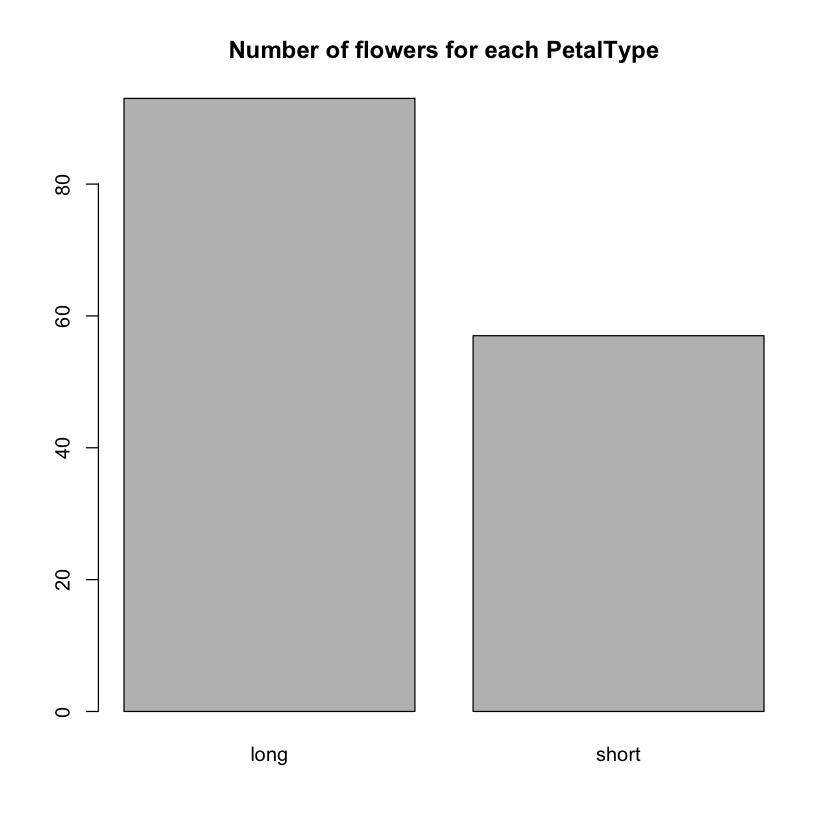

In [22]:
dat <- dat  %>%  
    mutate(PetalType = if_else(Petal.Length > mean(Petal.Length),"long","short"))

barplot(table(dat$PetalType), main= "Number of flowers for each PetalType")

head(dat)

Right now `Species` and `PetalType` are two different variables. Let's say for some reason you want a new variable that specifies both, e.g. 'short virginica', 'long setosa', etc. This is often useful when you are plotting and you want to use a color to denote each combination of two variables, instead of using a combination of colors and shapes. You can combine variables with the `unite()` command, which takes the arguments `unite(new_var, input1, input2)`. The `remove = FALSE` means it won't remove the two input variables. This is set to `TRUE` by default.

In [23]:
dat <- dat %>% 
      unite(Combined_var, Species, PetalType, remove=FALSE)
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Combined_var,Species,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>
1,5.1,3.5,1.4,0.2,setosa_short,setosa,short
2,4.9,3.0,1.4,0.2,setosa_short,setosa,short
3,4.7,3.2,1.3,0.2,setosa_short,setosa,short
4,4.6,3.1,1.5,0.2,setosa_short,setosa,short
5,5.0,3.6,1.4,0.2,setosa_short,setosa,short
6,5.4,3.9,1.7,0.4,setosa_short,setosa,short


With `mutate()`, you can also specify the separator (by default it is '\_') and whether to remove the original variables. Check the help section for more on how to do this (`?unite`). Note that in the commented section of the cell above, I generated the new variable and the combined variable all at once. 

## `separate()`: Split variable into multiple variables

The reverse of the operation above is called `separate()`. It becomes useful, for example, if you have the name of participants stored in one variable, but you want to separate it into First and Last name. For the illustration, I will just reverse the above example (adding 1 to the new variables, to distinguish them from the existing Species and PetalType variables):

In [24]:
dat <- dat  %>% 
    separate(Combined_var, into=c('Species1', 'PetalType1')) #separate combined var into the 2 original variables 
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species1,PetalType1,Species,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>
1,5.1,3.5,1.4,0.2,setosa,short,setosa,short
2,4.9,3.0,1.4,0.2,setosa,short,setosa,short
3,4.7,3.2,1.3,0.2,setosa,short,setosa,short
4,4.6,3.1,1.5,0.2,setosa,short,setosa,short
5,5.0,3.6,1.4,0.2,setosa,short,setosa,short
6,5.4,3.9,1.7,0.4,setosa,short,setosa,short


Like with `unite()`, you can specify the character you want `separate()` to split. For example, splitting at " " instead of at the default "_" for the First, Last name example. See `?separate` for more info.

## `group_by()`: Group data by a variable & perform operations individually by group

In the filtering example in section 4.3, we saw how to subset the data.frame separately for different species, and then to calculate the summaries. This is inefficient and also creates two separate data.frames. While you can join them manually afterwards, there is a much easier way with the **`group_by`** command.

When you pass a data.frame to a **group_by** command, you can specify names of variables, by which to split the data.frame. For example, if we specify the `Species` and `PetalType` variables in the group_by command, the data.frame will be **_implicitly_** split into 4 data.frames - one for each combination of species and petal type (note that there are only 2 species for `cleaned_dat` now because we got rid of the "setosa" species in section 4.3). E.g.:

In [25]:
# this creates the PetalType variable for cleaned_dat
cleaned_dat <- cleaned_dat %>%  
    mutate(PetalType = if_else(Petal.Length > mean(Petal.Length),"long","short")) 

cleaned_dat %>% 
    group_by(Species, PetalType) %>%
    print()

# A tibble: 100 × 6
# Groups:   Species, PetalType [4]
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species    PetalType
          <dbl>       <dbl>        <dbl>       <dbl> <fct>      <chr>    
 1          7           3.2          4.7         1.4 versicolor short    
 2          6.4         3.2          4.5         1.5 versicolor short    
 3          6.9         3.1          4.9         1.5 versicolor short    
 4          5.5         2.3          4           1.3 versicolor short    
 5          6.5         2.8          4.6         1.5 versicolor short    
 6          5.7         2.8          4.5         1.3 versicolor short    
 7          6.3         3.3          4.7         1.6 versicolor short    
 8          4.9         2.4          3.3         1   versicolor short    
 9          6.6         2.9          4.6         1.3 versicolor short    
10          5.2         2.7          3.9         1.4 versicolor short    
# … with 90 more rows


Now, the key is that the split is implicit - as you can see above, we still only have one data.frame, but now it has the specification:

`# Groups:   Species, PetalType [4]`

Every function that you add after `group_by()`, will be evaluated separately for each group, and then the results will be combined. Let's say you want to calculate the mean and sd for `Sepal.Length` and `Sepal.Width` separately for the four groups:

In [32]:
cleaned_dat  %>% 
    group_by(Species, PetalType)  %>% 
    summarise(SepLen_mean = mean(Sepal.Length),
              SepLen_sd = sd(Sepal.Length),
              SepWid_mean = mean(Sepal.Width),
              SepWid_sd = sd(Sepal.Length))


`summarise()` has grouped output by 'Species'. You can override using the
`.groups` argument.


Species,PetalType,SepLen_mean,SepLen_sd,SepWid_mean,SepWid_sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
versicolor,long,6.350000,0.4949747,2.850000,0.4949747
versicolor,short,5.918750,0.5147428,2.766667,0.5147428
virginica,long,6.688636,0.5851718,2.997727,0.5851718
virginica,short,5.850000,0.5244044,2.800000,0.5244044


`summarise()` has grouped output by 'PetalType'. You can override using the
`.groups` argument.


PetalType,Species,SepLen_mean,SepLen_sd,SepWid_mean,SepWid_sd
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
long,versicolor,6.350000,0.4949747,2.850000,0.4949747
long,virginica,6.688636,0.5851718,2.997727,0.5851718
short,versicolor,5.918750,0.5147428,2.766667,0.5147428
short,virginica,5.850000,0.5244044,2.800000,0.5244044


And that's all the code you need. If you have tried to do something like this in base R (i.e., without `dplyr` commands), you know how involved it is! `dplyr` can make your code **much** cleaner. What is going on behind the scenes is that the data.frame is separated into multiple data.frames, one for each combination of variables. Then the `summarise` function is executed on each, and the resulting 4 data.frames are automatically combined into a new resulting data.frame.

Note that the order by which you group variables matters. You can ungroup using `ungroup()`.

The `group_by` command works not only with `summarise`, but also with `mutate`. While with `summarise` it creates a new data.frame with summary results, with `mutate` it creates a new variable that is calculated separately for each group, and then combined into the final data.frame. This is useful, when, for example, we want to standardize variables within groups. Earlier we saw how to subtract the overall mean of `Sepal.Length` to center a variable. Let's say that we want to subtract the mean `Sepal.Length` of each species only from the flowers in that species. So, for our example we can do:

In [30]:
dat  %>% 
 #center values by mean for all data:
 mutate(SepLen_centered_overall = Sepal.Length - mean(Sepal.Length)) %>% 
 group_by(Species)  %>% 
 #center values by mean for each species:
 mutate(SepLen_centered_byspecies = Sepal.Length - mean(Sepal.Length)) %>% 
 #just show the relevant variables (there are a lot of variables in this data.frame now!):
 select(Species, SepLen_centered_overall:SepLen_centered_byspecies) %>% 
 head()

Species,SepLen_centered_overall,SepLen_centered_byspecies
<fct>,<dbl>,<dbl>
setosa,-0.7433333,0.094
setosa,-0.9433333,-0.106
setosa,-1.1433333,-0.306
setosa,-1.2433333,-0.406
setosa,-0.8433333,-0.006
setosa,-0.4433333,0.394


The second column above gives us the sepal lengths centered over the whole sample, while the third line, even though it looks the same, gives us the sepal lengths centered separately for each species. To illustrate, I will plot the means for each species under the two centerings (don't worry about the code if you don't know `ggplot2` yet):

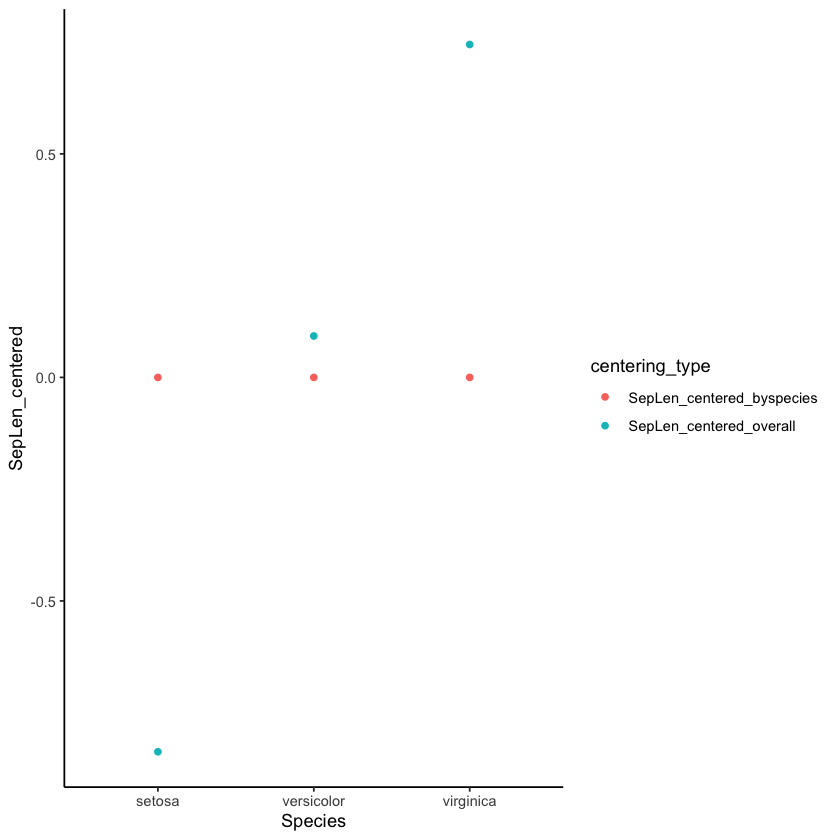

In [31]:
dat  %>% 
 mutate(SepLen_centered_overall = Sepal.Length - mean(Sepal.Length))  %>%
 group_by(Species)  %>% 
 mutate(SepLen_centered_byspecies = Sepal.Length - mean(Sepal.Length))  %>% 
 gather(key = centering_type, value = SepLen_centered, SepLen_centered_overall, SepLen_centered_byspecies)  %>% 
 ggplot(aes(Species, SepLen_centered, color=centering_type)) +
    stat_summary(geom='point',fun=mean) +
    theme_classic()

This plot makes sense, because if you're calculating `SepLen_centering_byspecies` by subtracting the species mean from each `Sepal.Length` value, the mean of the new values should be 0 for every species. Meanwhile, the `SepLen_centering_overall` values were calculated by subtracting the same amount from all `Sepal.Length` values, regardless of species, so we still see variation for these means across species.

There are a lot of other handy uses for `group_by`, which will be covered in future tutorials. 

# `nest()`: Explicitly grouping data

Recall from above that `group_by()` implicitly grouped our data: when we printed the dataframe, everything looked the same except for a small `Groups:   Species, PetalType [4]` message.

`nest()` functions similarly to `group_by()`, except it makes these groupings explicit. That is, it takes the subset of data associated with a certain grouping, and *nests* it within a single cell. That's right, it puts a whole data frame (ok technically a tibble) in a single cell.

Replicating our example from above:

In [40]:
head(cleaned_dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,7.0,3.2,4.7,1.4,versicolor,short
2,6.4,3.2,4.5,1.5,versicolor,short
3,6.9,3.1,4.9,1.5,versicolor,short
4,5.5,2.3,4.0,1.3,versicolor,short
5,6.5,2.8,4.6,1.5,versicolor,short
6,5.7,2.8,4.5,1.3,versicolor,short


In [48]:
nested  <- cleaned_dat %>% 
    nest(data = c(Sepal.Length:Petal.Width, PetalType)) %>%
    print()

# A tibble: 2 × 2
  Species    data             
  <fct>      <list>           
1 versicolor <tibble [50 × 5]>
2 virginica  <tibble [50 × 5]>


Notice under "data", we have a 50 x 5 tibble for each species of iris. Let's see what's really in cell [1, 2]:

In [50]:
nested[1,2]

data
<list>
"7 , 6.4 , 6.9 , 5.5 , 6.5 , 5.7 , 6.3 , 4.9 , 6.6 , 5.2 , 5 , 5.9 , 6 , 6.1 , 5.6 , 6.7 , 5.6 , 5.8 , 6.2 , 5.6 , 5.9 , 6.1 , 6.3 , 6.1 , 6.4 , 6.6 , 6.8 , 6.7 , 6 , 5.7 , 5.5 , 5.5 , 5.8 , 6 , 5.4 , 6 , 6.7 , 6.3 , 5.6 , 5.5 , 5.5 , 6.1 , 5.8 , 5 , 5.6 , 5.7 , 5.7 , 6.2 , 5.1 , 5.7 , 3.2 , 3.2 , 3.1 , 2.3 , 2.8 , 2.8 , 3.3 , 2.4 , 2.9 , 2.7 , 2 , 3 , 2.2 , 2.9 , 2.9 , 3.1 , 3 , 2.7 , 2.2 , 2.5 , 3.2 , 2.8 , 2.5 , 2.8 , 2.9 , 3 , 2.8 , 3 , 2.9 , 2.6 , 2.4 , 2.4 , 2.7 , 2.7 , 3 , 3.4 , 3.1 , 2.3 , 3 , 2.5 , 2.6 , 3 , 2.6 , 2.3 , 2.7 , 3 , 2.9 , 2.9 , 2.5 , 2.8 , 4.7 , 4.5 , 4.9 , 4 , 4.6 , 4.5 , 4.7 , 3.3 , 4.6 , 3.9 , 3.5 , 4.2 , 4 , 4.7 , 3.6 , 4.4 , 4.5 , 4.1 , 4.5 , 3.9 , 4.8 , 4 , 4.9 , 4.7 , 4.3 , 4.4 , 4.8 , 5 , 4.5 , 3.5 , 3.8 , 3.7 , 3.9 , 5.1 , 4.5 , 4.5 , 4.7 , 4.4 , 4.1 , 4 , 4.4 , 4.6 , 4 , 3.3 , 4.2 , 4.2 , 4.2 , 4.3 , 3 , 4.1 , 1.4 , 1.5 , 1.5 , 1.3 , 1.5 , 1.3 , 1.6 , 1 , 1.3 , 1.4 , 1 , 1.5 , 1 , 1.4 , 1.3 , 1.4 , 1.5 , 1 , 1.5 , 1.1 , 1.8 , 1.3 , 1.5 , 1.2 , 1.3 , 1.4 , 1.4 , 1.7 , 1.5 , 1 , 1.1 , 1 , 1.2 , 1.6 , 1.5 , 1.6 , 1.5 , 1.3 , 1.3 , 1.3 , 1.2 , 1.4 , 1.2 , 1 , 1.3 , 1.2 , 1.3 , 1.3 , 1.1 , 1.3 , short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, long , short, short, short, short, short, long , short, short, short, short, short, short, short, short, short, short, short, short, short, short, short, short"


Not very pretty, but we can see all our data stored in there!

In this example, we had to specify in the `data =` argument which columns we wanted to nest. Because we left out Species, this became our grouping variable, with all other data getting nested under the new `data` column.

If we leave out both species and PetalType, we get more nests. This is analogous to grouping by multiple variables:

In [47]:
cleaned_dat %>% 
    nest(data = c(Sepal.Length:Petal.Width)) %>%
    print()

# A tibble: 4 × 3
  Species    PetalType data             
  <fct>      <chr>     <list>           
1 versicolor short     <tibble [48 × 4]>
2 versicolor long      <tibble [2 × 4]> 
3 virginica  long      <tibble [44 × 4]>
4 virginica  short     <tibble [6 × 4]> 


You can even combine `group_by()` with `nest()` to streamline the variable selection. The below will nest all variables aside from the `group_by()` variable:

In [39]:
cleaned_dat  %>% 
    group_by(Species) %>% 
    nest() %>% 
    print()

# A tibble: 2 × 2
# Groups:   Species [2]
  Species    data             
  <fct>      <list>           
1 versicolor <tibble [50 × 5]>
2 virginica  <tibble [50 × 5]>


Note that any variables supplied to the `nest()` function above will override the `group_by()` variables.

So what is the difference between using `group_by()` versus `nest()`? For most of your operations, `group_by()` will probably be your go-to. However, `nest()` comes into play when the operations you need to perform over each group require a data frame as input (e.g., models). We'll see some examples of this below with `map()`.

---
# Restructuring data.frames - long to wide, wide to long, and merging

Remember how in section 2 we talked about how it's better to have a single observation in each row, instead of multiple observations per row? In this section we'll use the `dplyr` functions `pivot_longer` (formerly `gather`) and `pivot_wider` (formerly `spread`) to switch between short and long forms of the data. We'll also try out combining data.frames using the `*_join` family of functions. 

The `iris` data set has multiple measurements per row, so it is currently in the "wide" format. To put it in long format, we can make each row only have one measurement, and then variables that specify whether that measurment is for "sepal" or "petal", "length" or "width". 

In [ ]:
newdat <- iris # new duplicate of iris dataset so we don't have to deal with all the messy variables we created
newdat$flower.num <- 1:nrow(newdat) # like a participant ID, so we can put these back where they came from using "spread"
newdat <- newdat %>%
      gather(key="flower_att",value="measurement",
      Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)
head(newdat)




,Species,flower.num,flower_att,measurement
,<fct>,<int>,<chr>,<dbl>
1,setosa,1,Sepal.Length,5.1
2,setosa,2,Sepal.Length,4.9
3,setosa,3,Sepal.Length,4.7
4,setosa,4,Sepal.Length,4.6
5,setosa,5,Sepal.Length,5.0
6,setosa,6,Sepal.Length,5.4


Now this data set is in a long format, which is a tidier format for answering analysis questions ("Are petals longer than they are wide?") and for visualization. If I wanted to, I could use `separate()` to make the `flower_att` variable into two variables. We can also easily put it back in "wide" format using `spread`:

In [ ]:
newdat <- newdat %>%
      spread(flower_att,measurement)
head(newdat)

,Species,flower.num,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,setosa,1,1.4,0.2,5.1,3.5
2,setosa,2,1.4,0.2,4.9,3.0
3,setosa,3,1.3,0.2,4.7,3.2
4,setosa,4,1.5,0.2,4.6,3.1
5,setosa,5,1.4,0.2,5.0,3.6
6,setosa,6,1.7,0.4,5.4,3.9


The last function we'll cover in this tutorial is the `left_join()` function. Imagine that you saved your data so that personal information such as age was saved separately from your participants' response data. However, now you want to see if age impacts your effect size, and you'd like to add age as a variable in your main dataset. As long as both your response dataset and your personal information dataset have the participant ID in them, you should be able to add the participants' ages to the dataset easily using `left_join()`. See [this page](https://dplyr.tidyverse.org/reference/join.html) for more versions of the `join()` function that you can use to make merging datasets easier.

In [ ]:
personal <- data.frame(name = c("p01","p02"), age = c(18,21), firstlang = c("English", "Chinese")) # participant info
response <- data.frame(name= c("p01","p01","p02","p02"),response=c(0,1,1,0)) # response database
head(response)

response <- response %>% left_join(select(personal,name:age)) # don't need to use "select", but it avoids adding info not needed 
head(response)

,name,response
,<chr>,<dbl>
1,p01,0
2,p01,1
3,p02,1
4,p02,0


Joining, by = "name"



,name,response,age
,<chr>,<dbl>,<dbl>
1,p01,0,18
2,p01,1,18
3,p02,1,21
4,p02,0,21


# nest() and map ()

In [66]:
#simulating data: see prior tutorial for details
x1 <- seq(-4,4,0.5)
x2 <- seq(-4,4,0.5)
dat <- expand.grid(x1=x1, x2=x2) %>% 
    mutate(y = 1/(1+exp(-x1)) + 0.1*x2)
dat <- mutate(dat, y_obs = y + rnorm(length(y), mean=0, sd=0.1)) 

#fit a linear model to find the regression coefficients
model_fit <- lm(y_obs ~ x1 + x2, data=dat) 

This is where the fun part comes in. You can use the `nest` and `map` commands from `tidyverse` to fit a model for different subgroups, then extract the results of all models. Let's pretend that x1 is the participant number and we have different subjects, for which we have y and x2 values.

First, nest creates a nested data.frame, in which the data.frame for each group is stored in a different cell

In [67]:
dat  <- dat  %>%
        group_by(x1) %>%
        nest()

print(dat)

# A tibble: 17 × 2
# Groups:   x1 [17]
      x1 data             
   <dbl> <list>           
 1  -4   <tibble [17 × 3]>
 2  -3.5 <tibble [17 × 3]>
 3  -3   <tibble [17 × 3]>
 4  -2.5 <tibble [17 × 3]>
 5  -2   <tibble [17 × 3]>
 6  -1.5 <tibble [17 × 3]>
 7  -1   <tibble [17 × 3]>
 8  -0.5 <tibble [17 × 3]>
 9   0   <tibble [17 × 3]>
10   0.5 <tibble [17 × 3]>
11   1   <tibble [17 × 3]>
12   1.5 <tibble [17 × 3]>
13   2   <tibble [17 × 3]>
14   2.5 <tibble [17 × 3]>
15   3   <tibble [17 × 3]>
16   3.5 <tibble [17 × 3]>
17   4   <tibble [17 × 3]>


What we see here is that each "participant" has their own 17 x 3 tibble. Why these dimensions? We simulated `x1` and `x2` to be identical, both 17 observations long. The 3 columns are for `x2`, `y`, and `y_obs`. They are just now grouped by `x1`.

Remember, we want to fit models to each subgroup. The `map` function applies a given function to a set of data in an iterative way -- so this would be a convenient approach. Some of the benefits of using `map` are that you do not have to write a series of for-loops (it's efficient/vectorized) and it makes your code easier to read (and thus error check). Now you can use `map` to fit a model to each subgroup like this:

In [68]:
dat  <- dat  %>% 
    mutate(model_fit = map(data,
                           function(data) lm(y_obs ~ x2, data=data)))

print(dat)

# A tibble: 17 × 3
# Groups:   x1 [17]
      x1 data              model_fit
   <dbl> <list>            <list>   
 1  -4   <tibble [17 × 3]> <lm>     
 2  -3.5 <tibble [17 × 3]> <lm>     
 3  -3   <tibble [17 × 3]> <lm>     
 4  -2.5 <tibble [17 × 3]> <lm>     
 5  -2   <tibble [17 × 3]> <lm>     
 6  -1.5 <tibble [17 × 3]> <lm>     
 7  -1   <tibble [17 × 3]> <lm>     
 8  -0.5 <tibble [17 × 3]> <lm>     
 9   0   <tibble [17 × 3]> <lm>     
10   0.5 <tibble [17 × 3]> <lm>     
11   1   <tibble [17 × 3]> <lm>     
12   1.5 <tibble [17 × 3]> <lm>     
13   2   <tibble [17 × 3]> <lm>     
14   2.5 <tibble [17 × 3]> <lm>     
15   3   <tibble [17 × 3]> <lm>     
16   3.5 <tibble [17 × 3]> <lm>     
17   4   <tibble [17 × 3]> <lm>     


Let's break down what is going on in the `mutate` line above:
* `model_fit` is the name of our new column
* The first argument of `map` is what we want our function to iterate over. In this case, `data` is the name of the column of our nested tibbles.
* The second argument of `map` is whatever function you want performed. Here, we specified our own function (a linear model), but you could also use built-in functions.

So basically, for each observation of `data`, `map` will perform the function. It's just that in this case, a single observation of `data` is an entire tibble. 

(Note that `map` operates basically the same as the `*apply` family of functions (e.g., `lapply()`, `sapply`, etc.) but since `map` is part of the tidyverse, it plays better with tidyverse grammar and is more standardized.)

Our resulting models are stored in each cell of the model_fit column. Let's see what's included in a single cell in this column:

In [52]:
dat[1, "model_fit"]

model_fit
<list>
"-0.02660423, 0.103168, -0.1372348, 0.03059727, -0.02660468, 0.08687411, 0.1791387, -0.2292829, 0.06875712, -0.1114032, 0.09896134, -0.01441061, 0.1396485, 0.1815616, -0.1479196, -0.07825647, 0.02050686, 0.01632427, -0.07725744, 0.1096921, 1.041945, -0.009751889, 0.1059652, 0.2004681, -0.2057152, 0.09456317, -0.08335881, 0.129244, 0.01811038, 0.1744078, 0.2185592, -0.1086836, -0.03678222, 0.06421942, 0.06227515, -0.02906825, 2, -0.4392761, -0.3876921, -0.3361081, -0.2845241, -0.2329402, -0.1813562, -0.1297722, -0.07818821, -0.02660423, 0.02497975, 0.07656373, 0.1281477, 0.1797317, 0.2313157, 0.2828997, 0.3344836, 0.3860676, 0, 1, -4.123106, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 1.776357e-15, 10.0995, 0.2197359, 0.1702285, 0.1207211, 0.07121375, 0.02170637, -0.02780101, -0.07730838, -0.1268158, -0.1763231, -0.2258305, -0.2753379, -0.3248453, -0.3743526, -0.42386, -0.4733674, 1.242536, 1.269243, 1, 2, 1e-07, 2, 15, lm(formula = y_obs ~ x2, data = data), y_obs ~ x2, -0.5765109, -0.3570948, -0.3627128, -0.19765, -0.05380143, -0.4106391, -0.06101507, -0.1895914, 0.07235711, 0.01056914, 0.2162122, 0.3097093, 0.03181212, 0.1530592, 0.3034065, 0.3508079, 0.3088102, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4"


Super ugly, but this is the actual model fit information for our first row. 

It's much easier to extract the information you need from each model. Let's extract the coefficients:

In [55]:
dat <- dat  %>% 
        mutate(coef = map(model_fit, #now iterating over "model_fit" instead of "data"
                      #a function to create data frame of coef names/values:
                      function(fit) data.frame(name = names(fit$coefficients), 
                                               beta = fit$coefficients)))
print(dat)

# A tibble: 17 × 4
# Groups:   x1 [17]
      x1 data              model_fit coef        
   <dbl> <list>            <list>    <list>      
 1  -4   <tibble [17 × 3]> <lm>      <df [2 × 2]>
 2  -3.5 <tibble [17 × 3]> <lm>      <df [2 × 2]>
 3  -3   <tibble [17 × 3]> <lm>      <df [2 × 2]>
 4  -2.5 <tibble [17 × 3]> <lm>      <df [2 × 2]>
 5  -2   <tibble [17 × 3]> <lm>      <df [2 × 2]>
 6  -1.5 <tibble [17 × 3]> <lm>      <df [2 × 2]>
 7  -1   <tibble [17 × 3]> <lm>      <df [2 × 2]>
 8  -0.5 <tibble [17 × 3]> <lm>      <df [2 × 2]>
 9   0   <tibble [17 × 3]> <lm>      <df [2 × 2]>
10   0.5 <tibble [17 × 3]> <lm>      <df [2 × 2]>
11   1   <tibble [17 × 3]> <lm>      <df [2 × 2]>
12   1.5 <tibble [17 × 3]> <lm>      <df [2 × 2]>
13   2   <tibble [17 × 3]> <lm>      <df [2 × 2]>
14   2.5 <tibble [17 × 3]> <lm>      <df [2 × 2]>
15   3   <tibble [17 × 3]> <lm>      <df [2 × 2]>
16   3.5 <tibble [17 × 3]> <lm>      <df [2 × 2]>
17   4   <tibble [17 × 3]> <lm>      <df [2 × 2]>


They are again stored in a column called coef that holds a data frame in each cell. If you want to then finally just get a data.frame with coefficients, you can unnest the results:

In [56]:
dat  <- dat  %>% 
        unnest(coef)

print(dat)

# A tibble: 34 × 5
# Groups:   x1 [17]
      x1 data              model_fit name           beta
   <dbl> <list>            <list>    <chr>         <dbl>
 1  -4   <tibble [17 × 3]> <lm>      (Intercept) -0.0266
 2  -4   <tibble [17 × 3]> <lm>      x2           0.103 
 3  -3.5 <tibble [17 × 3]> <lm>      (Intercept)  0.0336
 4  -3.5 <tibble [17 × 3]> <lm>      x2           0.0900
 5  -3   <tibble [17 × 3]> <lm>      (Intercept)  0.103 
 6  -3   <tibble [17 × 3]> <lm>      x2           0.104 
 7  -2.5 <tibble [17 × 3]> <lm>      (Intercept)  0.0975
 8  -2.5 <tibble [17 × 3]> <lm>      x2           0.0883
 9  -2   <tibble [17 × 3]> <lm>      (Intercept)  0.0941
10  -2   <tibble [17 × 3]> <lm>      x2           0.0944
# … with 24 more rows


You can find additional information on this approach here: http://omaymas.github.io/Climate_Change_ExpAnalysis/

*Notebook authored by Ven Popov and edited by Krista Bond, Charles Wu, Patience Stevens, and Amy Sentis.*